In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os
import cv2

In [3]:
base_path = "/content/gdrive/MyDrive/EMMBIOME/SERBIA/Biomedical Imaging/Seminar Paper/ARCADE/syntax/train"
train_images_path = os.path.join(base_path, "images")
train_json_path = os.path.join(base_path, "annotations", "train.json")

Source: https://www.kaggle.com/code/nirmalgaud/artery-segment-classification-and-stenosis-detect

In [ ]:
import json
def load_json(json_path): # mask images were stored as json files, so we need this function to read them
    with open(json_path, 'r') as f: # open in read mode
        data = json.load(f)
    return data

In [ ]:
def create_mask_from_annotations(annotations, image_id, image_shape):
    mask = np.zeros(image_shape, dtype=np.uint8) # create an empty mask filled with zeros that has the same shape as the image

    for ann in annotations:
        if ann['image_id'] == image_id:
            for seg in ann['segmentation']:
                pts = np.array(seg).reshape(-1, 2).astype(np.int32) # convert segmentation points to numpy array and reshape
                cv2.fillPoly(mask, [pts], 255) # fill the polygon defined by the points with white color (255) - the vessel region

    return mask

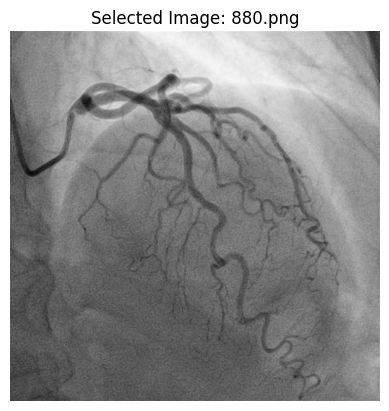

In [64]:
data = load_json(train_json_path)
index = 25
sample_image = data['images'][index]
image_id = sample_image['id']
image_file = sample_image['file_name']
image_path = os.path.join(train_images_path, image_file)

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title(f"Selected Image: {image_file}")
plt.axis('off')
plt.show()

# Showing Histogram

/tmp/ipython-input-2186518417.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(),256,[0,256])


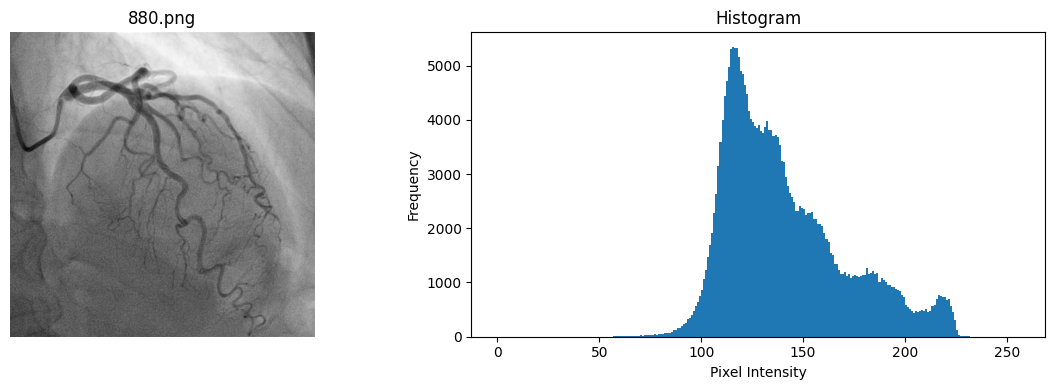

In [65]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title(f"{image_file}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(img.ravel(),256,[0,256])
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Gaussian Blur

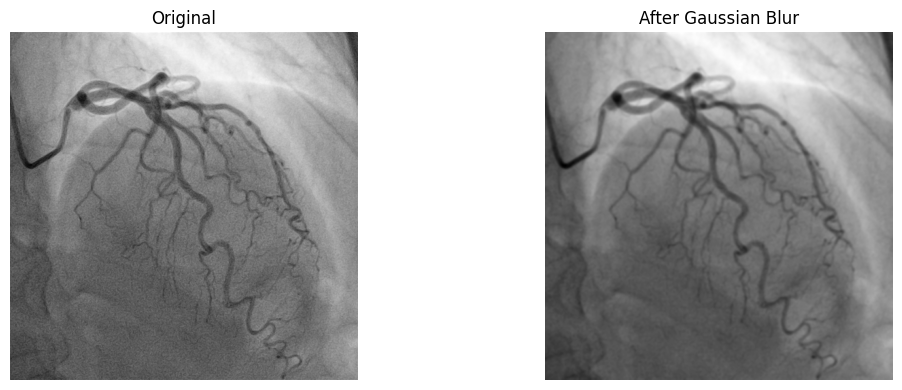

In [66]:
blur = cv2.GaussianBlur(img, (7, 7), 0)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(blur, cmap='gray')
plt.title("After Gaussian Blur")
plt.axis('off')

plt.tight_layout()
plt.show()

# Canny edge detection

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

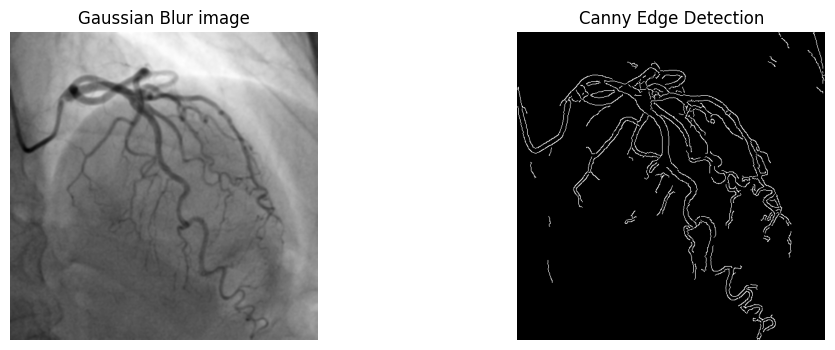

In [102]:
tlow = int(0.1 * 255) # This value need to be adjusted for each image due to the contrast difference
thigh = int(0.2 * 255) # This value need to be adjusted for each image due to the contrast difference

edges = cv2.Canny(blur, tlow, thigh)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(blur, cmap='gray')
plt.title("Gaussian Blur image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

In [ ]:
annotations = data["annotations"] # load all annotations from the json file
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) # convert the original grayscale image to RGB so that we can overlay the mask and edges in different colors
mask = create_mask_from_annotations(
    annotations, image_id, img.shape
) # create the mask from annotations for the selected image
overlay = img_rgb.copy()
overlay[mask == 255] = [255, 0, 0] # Red color for the vessel region from annotations
final_mask = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) # convert the original grayscale image to RGB again for the final overlay
final_mask[edges == 255] = [0, 255, 0] # Green color for the edges detected by Canny

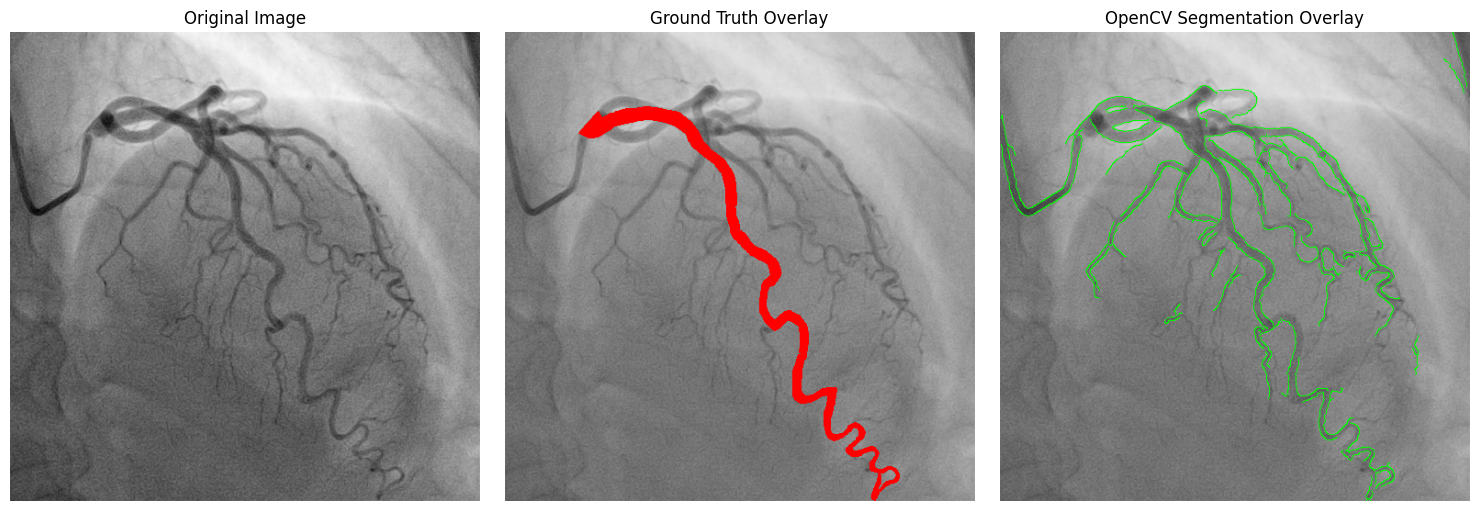

In [95]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(overlay)
plt.title("Ground Truth Overlay")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(final_mask)
plt.title("OpenCV Segmentation Overlay")
plt.axis('off')
plt.tight_layout()
plt.show()